# Bringing Noncontributing Forces into Evidence

This is a simple double pendulum with two masses and each pendulum section has the same length.

In [1]:
import sympy as sm
import sympy.physics.mechanics as me
me.init_vprinting()

In [2]:
q1, q2 = me.dynamicsymbols('q1, q2')
u1, u2, u3, u4 = me.dynamicsymbols('u1:5')

In [3]:
m1, m2, g, l = sm.symbols('m1, m2, g, l')

In [4]:
N = me.ReferenceFrame('N')
A = N.orientnew('A', 'Axis', (q1, N.z))
B = N.orientnew('B', 'Axis', (q2, N.z))

In [5]:
A.set_ang_vel(N, u1*N.z)
B.set_ang_vel(N, u2*N.z)

In [6]:
O = me.Point('O')
P1 = O.locatenew('P1', -l*A.y)
P2 = P1.locatenew('P2', -l*B.y)

In [7]:
O.set_vel(N, 0)

In [8]:
P1.v2pt_theory(O, N, A)

In [9]:
P2.v2pt_theory(P1, N, B)

# Introduce fictitious generalized speeds that correspond to components of desired forces and torques

Here I introduce the fictitious generalized speed u3 that lets the particle P1 have a "separation velocity" relative to its fixed location on the pendulum arm. This is aligned with the desired non-contributing tension force we want to bring into evidence.

In [10]:
P1.set_vel(N, P1.vel(N) + u3*A.y)
P1.vel(N)

In [11]:
P2.v2pt_theory(P1, N, B)

Add a similar fictitious generalized speed u4 for the second tension force.

In [12]:
P2.set_vel(N, P2.vel(N) + u4*B.y)
P2.vel(N)

In [13]:
P1.acc(N)

In [14]:
P2.acc(N)

# Introduce unknown force and torques into the resultants

These are the two time varying tension forces we want to bring into evidence:

In [15]:
TP1, TP2 = me.dynamicsymbols('T_{P1}, T_{P2}')

For u1 and u2, we use the resultant with only the original contributing forces.

In [16]:
RP1 = -m1*g*N.y
RP2 = -m2*g*N.y

For the particle we need to add the non-contributing forces that correspond to u3 and u4

In [17]:
RP1_aux = RP1 + TP1*A.y
RP2_aux = RP1 + TP2*B.y

We also need equal and opposite tension forces acting back on the pendulum arm (but not the force due to gravity):

In [18]:
RP1_aux_neg = -TP1*A.y
RP2_aux_neg = -TP2*B.y

# GAF

Calculate the two GAFs for the the real genearlized speeds as normal:

In [19]:
F1 = P1.vel(N).diff(u1, N).dot(RP1) + P2.vel(N).diff(u1, N).dot(RP2)
F2 = P1.vel(N).diff(u2, N).dot(RP1) + P2.vel(N).diff(u2, N).dot(RP2)

For F3 and F4 you need to use the resultaants that include the tension forces and they need to be associated with the appropriate velocities for the equal and opposite forces.

In [20]:
F3 = (P1.vel(N).diff(u3, N).dot(RP1 + TP1*A.y) +  # velocity of the particle which includes u3 
      (P1.vel(N) - u3*A.y).diff(u3, N).dot(-TP1*A.y) +  # velocity of the tip of the pendulum arm (does not include u3)
      P2.vel(N).diff(u3, N).dot(RP2 + TP2*B.y) +  # velocity of the second particle which includes u3 and u4
      (P2.vel(N) - u4*B.y).diff(u3, N).dot(-TP2*B.y))  # velocity of the tip of the second pendulum arm (includes u3 but not u4)
F3

In [21]:
F4 = (P1.vel(N).diff(u4, N).dot(RP1 + TP1*A.y) +
      (P1.vel(N) - u3*A.y).diff(u4, N).dot(-TP1*A.y) +
      P2.vel(N).diff(u4, N).dot(RP2 + TP2*B.y) +
      (P2.vel(N) - u4*B.y).diff(u4, N).dot(-TP2*B.y))

F4

# GIF

Calculate all GIFs with u1, u2, u3, and u4 present in the velocities and accelerations.

In [22]:
F1s = P1.vel(N).diff(u1, N).dot(-m1*P1.acc(N)) + P2.vel(N).diff(u1, N).dot(-m2*P2.acc(N))
F2s = P1.vel(N).diff(u2, N).dot(-m1*P1.acc(N)) + P2.vel(N).diff(u2, N).dot(-m2*P2.acc(N))
F3s = P1.vel(N).diff(u3, N).dot(-m1*P1.acc(N)) + P2.vel(N).diff(u3, N).dot(-m2*P2.acc(N))
F4s = P1.vel(N).diff(u4, N).dot(-m1*P1.acc(N)) + P2.vel(N).diff(u4, N).dot(-m2*P2.acc(N))

F1s

In [23]:
F2s

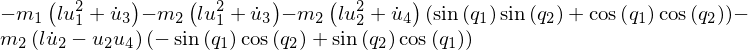

In [24]:
F3s

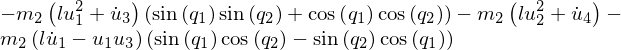

In [25]:
F4s

# Kane's Equations

In [26]:
k1 = F1 + F1s
k2 = F2 + F2s
k3 = F3 + F3s
k4 = F4 + F4s

# Substitute zero for all fictitious quantities

In [27]:
k1_ = k1.subs({u3.diff(): 0, u4.diff(): 0, u3: 0, u4: 0})
k2_ = k2.subs({u3.diff(): 0, u4.diff(): 0, u3: 0, u4: 0})
k3_ = k3.subs({u3.diff(): 0, u4.diff(): 0, u3: 0, u4: 0})
k4_ = k4.subs({u3.diff(): 0, u4.diff(): 0, u3: 0, u4: 0})

In [28]:
kanes = [k1_, k2_, k3_, k4_]

In [29]:
me.find_dynamicsymbols(k1_)

In [30]:
me.find_dynamicsymbols(k2_)

In [31]:
me.find_dynamicsymbols(k3_)

In [32]:
me.find_dynamicsymbols(k4_)

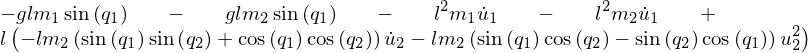

In [33]:
k1_

In [34]:
k2_

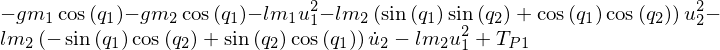

In [35]:
k3_

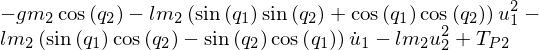

In [36]:
k4_

# Solve for all unknowns

In [37]:
sol = sm.solve(kanes, u1.diff(), u2.diff(), TP1, TP2)

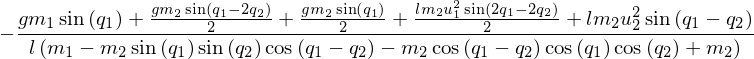

In [38]:
sol[u1.diff()].simplify()

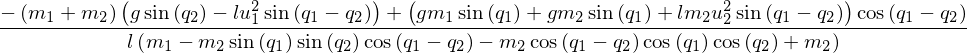

In [39]:
sol[u2.diff()].simplify()

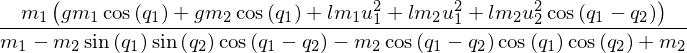

In [40]:
sol[TP1].simplify()

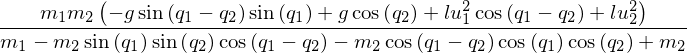

In [41]:
sol[TP2].simplify()

In [42]:
TP1_sol = sol[TP1].simplify()

In [43]:
me.find_dynamicsymbols(TP1_sol)

In [44]:
TP1_sol.free_symbols

# Verify answer using Newton-Euler equations

In [45]:
veq1 = -m1*P1.acc(N).subs({u3.diff(): 0, u4.diff(): 0, u3: 0, u4: 0}) + (TP2*sm.sin(q2) - TP1*sm.sin(q1))*N.x + (TP1*sm.cos(q1)-TP2*sm.cos(q2) - m1*g)*N.y
veq2 = -m2*P2.acc(N).subs({u3.diff(): 0, u4.diff(): 0, u3: 0, u4: 0}) + (-TP2*sm.sin(q2)*N.x + (TP2*sm.cos(q2)-m2*g)*N.y)

In [46]:
scalar_eqs = [veq1.dot(N.x),
              veq1.dot(N.y),
              veq2.dot(N.x),
              veq2.dot(N.y)]

In [47]:
newton_sol = sm.solve(scalar_eqs, u1.diff(), u2.diff(), TP1, TP2)

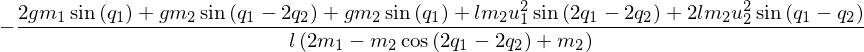

In [48]:
newton_sol[u1.diff()].simplify()

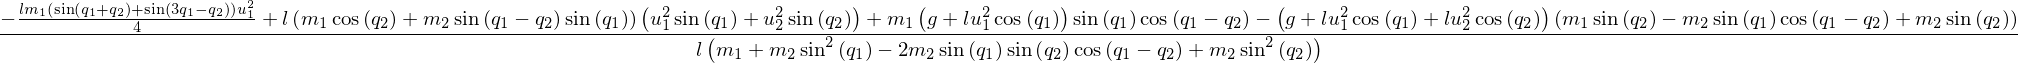

In [49]:
newton_sol[u2.diff()].simplify()

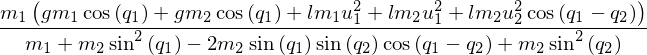

In [50]:
newton_sol[TP1].trigsimp()

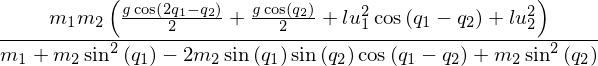

In [51]:
newton_sol[TP2].trigsimp()

If we substract the two solutions they should simplify to zero if they are the same (note this doesn't always work for large expressions due to the limitations of simplification).

In [52]:
(newton_sol[TP2].expand() - sol[TP2].expand()).simplify()

# Evaluate the force expressions with arrays

And compare their results numerically.

In [53]:
eval_TP1 = sm.lambdify((q1, q2, u1, u2, m1, m2, g, l), TP1_sol)

In [54]:
import numpy as np

In [55]:
times = np.linspace(0, 10)
omega = 0.2

In [56]:
q1_vals = np.sin(omega*times)

In [57]:
u1_vals = omega*np.cos(omega*times)

In [58]:
vals = eval_TP1(q1_vals, q1_vals, u1_vals, u1_vals, 1.0, 1.0, 9.81, 2.0)

In [59]:
me.find_dynamicsymbols(newton_sol[TP1])

In [60]:
eval_TP1_newton = sm.lambdify((q1, q2, u1, u2, m1, m2, g, l), newton_sol[TP1])
vals_newton = eval_TP1_newton(q1_vals, q1_vals, u1_vals, u1_vals, 1.0, 1.0, 9.81, 2.0)

In [61]:
import matplotlib.pyplot as plt

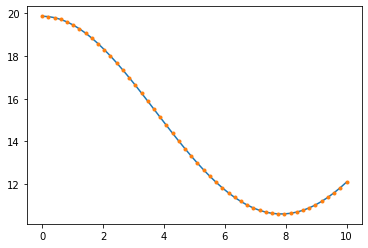

In [62]:
plt.plot(times, vals, times, vals_newton, '.')

In [63]:
func = lambda x, y: x + y

In [64]:
func(1, 2)

In [65]:
generate_numeric_func = sm.lambdify

In [66]:
eval_TP1 = generate_numeric_func((q1, u1, m1, g, l), TP1_sol)